## Linear Regression Scratch Implementation

In [143]:
# Import the Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.model_selection import train_test_split

In [144]:
#Regression Dataset
X,y = datasets.make_regression(n_samples=100, n_features=1,noise=10, random_state=100)

In [145]:
#X[:],y[:]

In [146]:
X.shape

(100, 1)

In [147]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [148]:
#X[:,0]

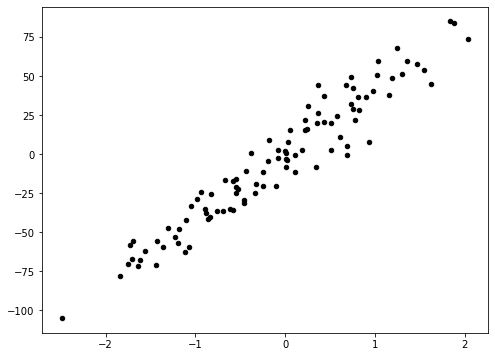

In [149]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], y, color="black",marker="o",s=20)
plt.show()

In [159]:
class LinearRegression:
    def __init__(self,lr=0.001,n_iters=100):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self,X,y):
        #Initialize parameters
        n_samples,n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        #Gradient Descent
        for single_iterations in range(self.n_iters):
            #y = W.x + b
            y_predicted = np.dot(X,self.weights) + self.bias
            
            
            dw = (2 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (2 / n_samples) * np.sum(y_predicted - y)
            
            #Update the Weights & Bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            if single_iterations%10 == 0:
                self.plot(single_iterations)
            
            #self.plot()
    
    def plot(self,iterations):
        y_predicted_new = np.dot(X_test,self.weights) + self.bias
        fig = plt.figure(figsize=(10,6))
        m2 = plt.scatter(X_test,y_test,s=30)
        plt.plot(X_test,y_predicted_new, color="black", marker="x", linewidth=1, label="Prediction")
        plt.title(f"After {iterations} Iterations")
        plt.show()
    
    def predict(self,X):
        y_predicted = np.dot(X,self.weights) + self.bias
        return y_predicted

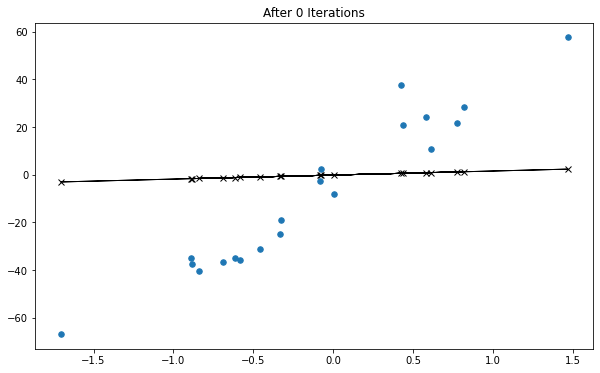

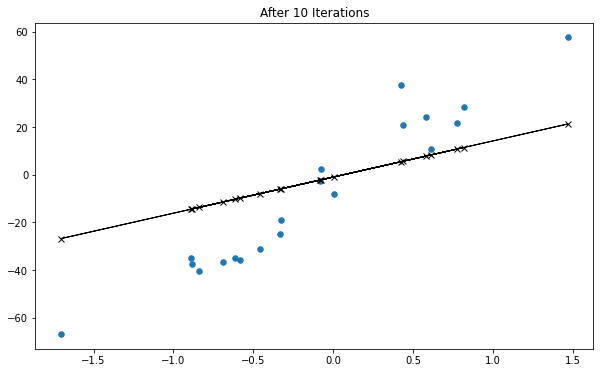

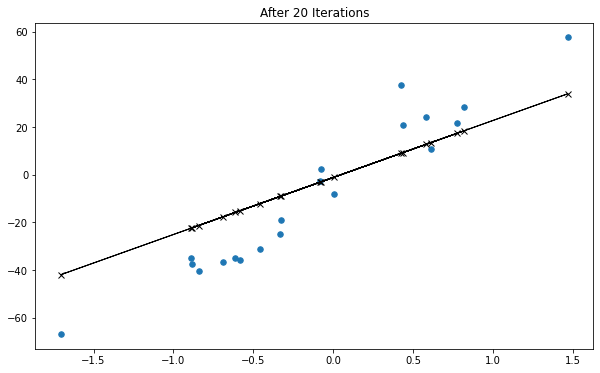

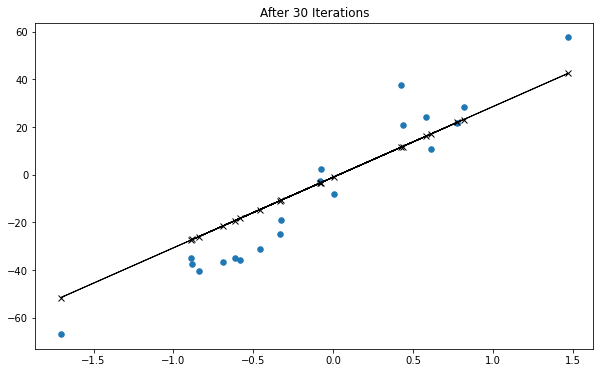

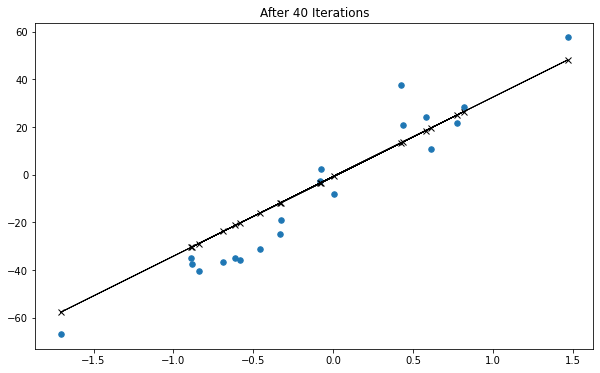

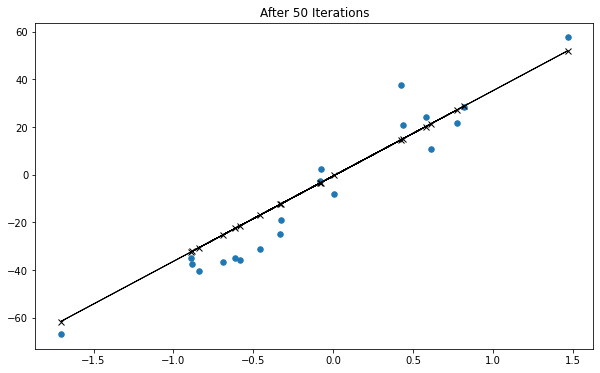

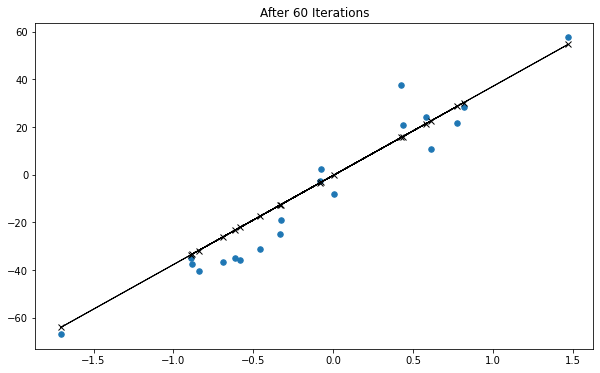

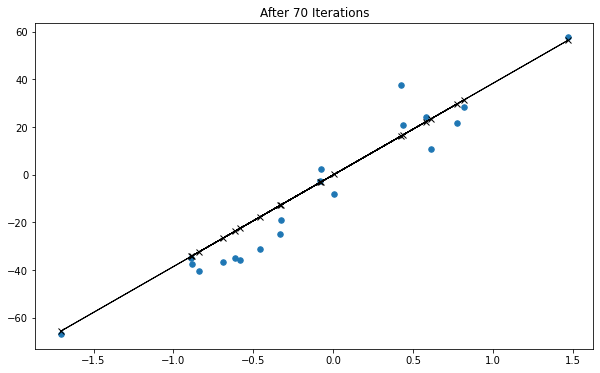

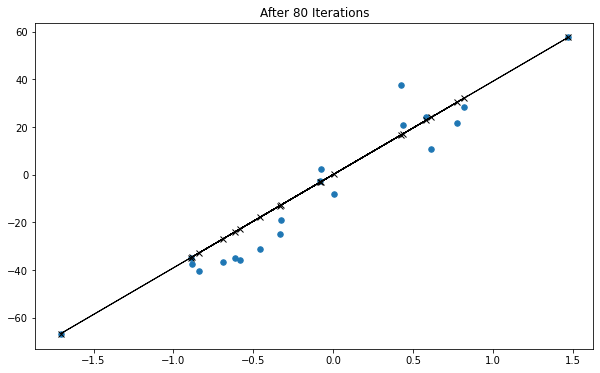

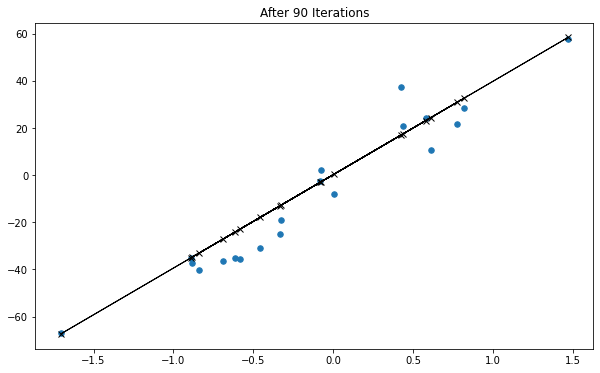

In [160]:
clf = LinearRegression(lr=0.02)
clf.fit(X_train,y_train)

In [136]:
predictions = clf.predict(X_test)

In [137]:
#len(predictions)

In [138]:
def MSE(predictiosn, y_true):
    return np.mean((predictions - y_true)**2)

In [139]:
MSE(predictions, y_test)

80.86329879439093

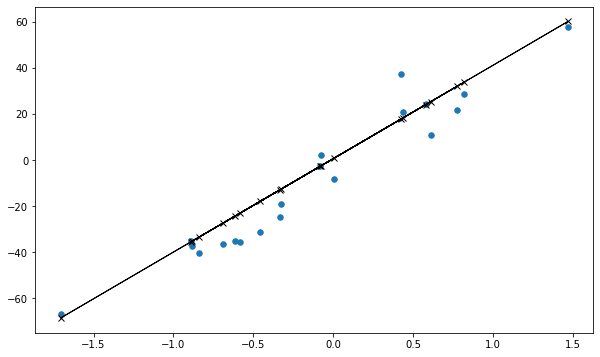

In [140]:
#Plotting the Results
y_pred_line = clf.predict(X_test)
fig = plt.figure(figsize=(10,6))
#m1 = plt.scatter(X_train,y_train,s=10)
m2 = plt.scatter(X_test,y_test,s=30)

plt.plot(X_test,y_pred_line, color="black", marker="x", linewidth=1, label="Prediction")
plt.show()